## Assignment for 3.3 Supervised Learning

Author: Derek ENG assisted by Microsoft Copilot
Jupyter Environment: ml

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [4]:
# Load the dataset
loan_data = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/Loan-Approval-Prediction.csv')

In [5]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_data.info() # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
loan_data.describe() # Statistical summary

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan_data.isna().sum() # Check for missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data Loading and Exploration

In [9]:
# Data loading and basic exploration
import pandas as pd
import numpy as np

# Load dataset
loan_data = pd.read_csv(
    "https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/Loan-Approval-Prediction.csv"
)

# Quick look
print("Shape:", loan_data.shape)
print("\nColumns:", loan_data.columns.tolist())
print("\nHead:")
print(loan_data.head())

# Target distribution
print("\nLoan_Status value counts:")
print(loan_data['Loan_Status'].value_counts(dropna=False))

Shape: (614, 13)

Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Head:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.

## Data preprocessing (missing values, encoding, scaling)

In [10]:
# Preprocessing pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split features and target
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status'].copy()

# Encode target to binary (if it's 'Y'/'N' or similar)
if y.dtype == object:
    y = y.map({'Y': 1, 'N': 0})  # adjust mapping if different labels exist
    # If mapping produced NaNs (unexpected labels), fallback to LabelEncoder
    if y.isna().any():
        y = LabelEncoder().fit_transform(loan_data['Loan_Status'])

# Identify column types
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Numeric pipeline: median imputation + scaling
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: most frequent imputation + one-hot encoding (drop='first' to avoid multicollinearity)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
], remainder='drop')

Numeric columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


## Feature selection

In [11]:
# We'll use SelectKBest with mutual_info_classif after preprocessing.
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Create a small helper pipeline to fit SelectKBest on transformed data
from sklearn.base import TransformerMixin, BaseEstimator

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, k=10):
        self.k = k
        self.selector = None

    def fit(self, X, y=None):
        self.selector = SelectKBest(score_func=mutual_info_classif, k=self.k)
        self.selector.fit(X, y)
        return self

    def transform(self, X):
        return self.selector.transform(X)

# We'll decide k based on number of features after encoding
# Fit preprocessor to get transformed feature count
X_pre = preprocessor.fit_transform(X)
n_features_after_encoding = X_pre.shape[1]
print("Features after encoding:", n_features_after_encoding)

# Choose k (for example, min(15, n_features_after_encoding))
k = min(15, n_features_after_encoding)
print("Selecting top k =", k, "features by mutual information")

feature_selector = FeatureSelector(k=k)
feature_selector.fit(X_pre, y)
X_selected = feature_selector.transform(X_pre)
print("Selected feature matrix shape:", X_selected.shape)

Features after encoding: 634
Selecting top k = 15 features by mutual information


/home/engpookw/miniconda3/envs/ml_spideyenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Selected feature matrix shape: (614, 15)


## Model training (Logistic Regression and KNN) with hyperparameter tuning

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build full pipelines: preprocessor -> feature selector -> model
from sklearn.pipeline import make_pipeline

# Logistic Regression pipeline
pipe_lr = make_pipeline(
    preprocessor,
    FeatureSelector(k=k),
    LogisticRegression(max_iter=1000, random_state=42)
)

# KNN pipeline
pipe_knn = make_pipeline(
    preprocessor,
    FeatureSelector(k=k),
    KNeighborsClassifier()
)

# Hyperparameter grids
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_lr = {
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs']
}

param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]  # Manhattan or Euclidean
}

# Grid searches
gs_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=cv, scoring='roc_auc', n_jobs=-1)
gs_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=cv, scoring='roc_auc', n_jobs=-1)

# Fit
print("Fitting Logistic Regression...")
gs_lr.fit(X_train_raw, y_train)
print("Best LR params:", gs_lr.best_params_)
print("Best LR CV ROC AUC:", gs_lr.best_score_)

print("\nFitting KNN...")
gs_knn.fit(X_train_raw, y_train)
print("Best KNN params:", gs_knn.best_params_)
print("Best KNN CV ROC AUC:", gs_knn.best_score_)

Fitting Logistic Regression...


/home/engpookw/miniconda3/envs/ml_spideyenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/engpookw/miniconda3/envs/ml_spideyenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/engpookw/miniconda3/envs/ml_spideyenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/engpookw/miniconda3/envs/ml_spideyenv/lib/python3.11/site-packages/sklearn/preprocess

Best LR params: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best LR CV ROC AUC: 0.711965315736309

Fitting KNN...


/home/engpookw/miniconda3/envs/ml_spideyenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/engpookw/miniconda3/envs/ml_spideyenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/engpookw/miniconda3/envs/ml_spideyenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/engpookw/miniconda3/envs/ml_spideyenv/lib/python3.11/site-packages/sklearn/preprocess

Best KNN params: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Best KNN CV ROC AUC: 0.7054534962757371


## Model evaluation (accuracy, precision, recall, F1, ROC AUC) and ROC curve


=== Evaluation: Logistic Regression ===
Accuracy : 0.8536585365853658
Precision: 0.8316831683168316
Recall   : 0.9882352941176471
F1-score : 0.903225806451613
ROC AUC  : 0.7704334365325077

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


=== Evaluation: KNN ===
Accuracy : 0.7967479674796748
Precision: 0.8333333333333334
Recall   : 0.8823529411764706
F1-score : 0.8571428571428571
ROC AUC  : 0.7422600619195047

Classification report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65        38
           1       0.83      0.88      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.74      0

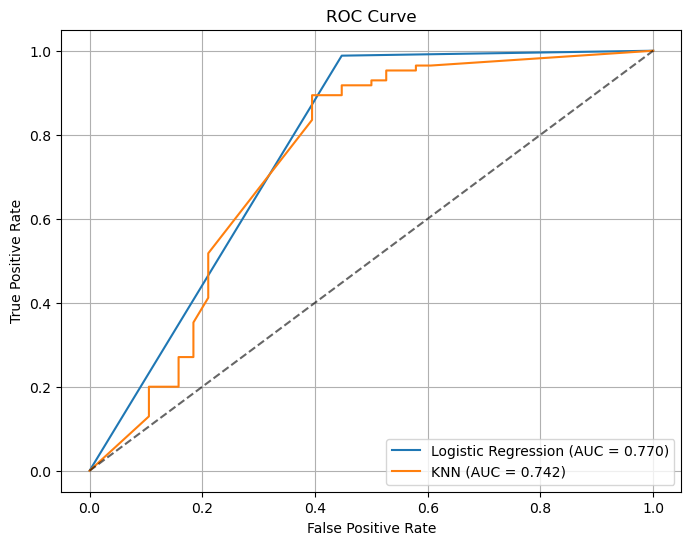

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    # Some models may not have predict_proba (KNN and LR do), but we try predict_proba first
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except Exception:
        # fallback to decision_function if available
        try:
            y_proba = model.decision_function(X_test)
        except Exception:
            y_proba = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    print(f"\n=== Evaluation: {model_name} ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("ROC AUC  :", roc_auc)
    print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

    # Plot ROC
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")
    else:
        print("No probability scores available for ROC curve.")

# Evaluate best estimators
best_lr = gs_lr.best_estimator_
best_knn = gs_knn.best_estimator_

plt.figure(figsize=(8, 6))
evaluate_model(best_lr, X_test_raw, y_test, "Logistic Regression")
evaluate_model(best_knn, X_test_raw, y_test, "KNN")

plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Create a comparison DataFrame between the tuned Logistic Regression and KNN models
# Assumes the previous cell has been run and the following variables exist:
# gs_lr, gs_knn, best_lr, best_knn, X_test_raw, y_test

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def safe_proba_score(model, X):
    """Return probability scores for the positive class if available, else None."""
    if hasattr(model, "predict_proba"):
        try:
            return model.predict_proba(X)[:, 1]
        except Exception:
            return None
    if hasattr(model, "decision_function"):
        try:
            return model.decision_function(X)
        except Exception:
            return None
    return None

def compute_metrics(model, X, y, model_name=None, best_params=None):
    y_pred = model.predict(X)
    y_proba = safe_proba_score(model, X)

    metrics = {
        "Model": model_name if model_name is not None else type(model).__name__,
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, zero_division=0),
        "Recall": recall_score(y, y_pred, zero_division=0),
        "F1": f1_score(y, y_pred, zero_division=0),
        "ROC_AUC": roc_auc_score(y, y_proba) if y_proba is not None else np.nan,
        "Best_Params": best_params if best_params is not None else {}
    }
    return metrics

# Gather metrics for both models
metrics_lr = compute_metrics(
    best_lr, X_test_raw, y_test,
    model_name="Logistic Regression",
    best_params=(gs_lr.best_params_ if 'gs_lr' in globals() and hasattr(gs_lr, 'best_params_') else {})
)

metrics_knn = compute_metrics(
    best_knn, X_test_raw, y_test,
    model_name="KNN",
    best_params=(gs_knn.best_params_ if 'gs_knn' in globals() and hasattr(gs_knn, 'best_params_') else {})
)

# Build DataFrame
comparison_df = pd.DataFrame([metrics_lr, metrics_knn])

# Round numeric metrics for readability without using applymap
num_cols = ["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"]

for col in num_cols:
    if col not in comparison_df.columns:
        continue
    # If column is already numeric dtype, use vectorized round
    if pd.api.types.is_numeric_dtype(comparison_df[col]):
        comparison_df[col] = comparison_df[col].round(4)
    else:
        # Mixed types: round only numeric values, leave others (and NaN) unchanged
        comparison_df[col] = comparison_df[col].map(
            lambda v: round(v, 4) if pd.notnull(v) and isinstance(v, (int, float, np.floating, np.integer)) else v
        )

# Reorder columns
cols = ["Model"] + num_cols + ["Best_Params"]
comparison_df = comparison_df[cols]

# Sort by ROC_AUC (NaNs last) and reset index
comparison_df = comparison_df.sort_values(by="ROC_AUC", ascending=False, na_position='last').reset_index(drop=True)

# Display the comparison DataFrame
print("Model comparison on test set:")
display(comparison_df)

Model comparison on test set:


,Model,Accuracy,Precision,Recall,F1,ROC_AUC,Best_Params
0,Logistic Regression,0.8537,0.8317,0.9882,0.9032,0.7704,"{'logisticregression__C': 10, 'logisticregress..."
1,KNN,0.7967,0.8333,0.8824,0.8571,0.7423,"{'kneighborsclassifier__n_neighbors': 7, 'knei..."
